In [185]:
import pandas as pd 

In [186]:
software_technique_table = pd.read_excel("./enterprise-attack-v9.0-software.xlsx", "techniques used")
software_technique_table.drop(columns=["source type", "mapping type", "mapping description", "target type"])
#software_list = pd.read_excel("./Data collection MITRE ATT&CK.xlsx", sheet_name = 'Software', usecols= ['ID'])
#technique_list = pd.read_excel("./Data collection MITRE ATT&CK.xlsx", sheet_name = 'Techniques', usecols= ['ID'])
#software_technique_table

,source ID,source name,target ID,target name,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,S0066,3PARA RAT,T1083,File and Directory Discovery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,S0066,3PARA RAT,T1573.001,Symmetric Cryptography,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,S0066,3PARA RAT,T1070.006,Timestomp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,S0066,3PARA RAT,T1071.001,Web Protocols,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,S0065,4H RAT,T1083,File and Directory Discovery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5709,S0350,zwShell,T1082,System Information Discovery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5710,S0350,zwShell,T1016,System Network Configuration Discovery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5711,S0350,zwShell,T1033,System Owner/User Discovery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5712,S0350,zwShell,T1059.003,Windows Command Shell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# want to plot
# - target ID (=technique ID) by appearance
# - Verteilung der Target IDs plotten
# - Anzahl Techniques pro Software plotten
# Anzahl verschiedener Techniques

# later
# Anzahl tactics pro Technique (Verteilung)
# Welche Tacics haben wieviele verschiedene Techniques
# Anzahl Software/ Techniques über die Jahre

<AxesSubplot:>

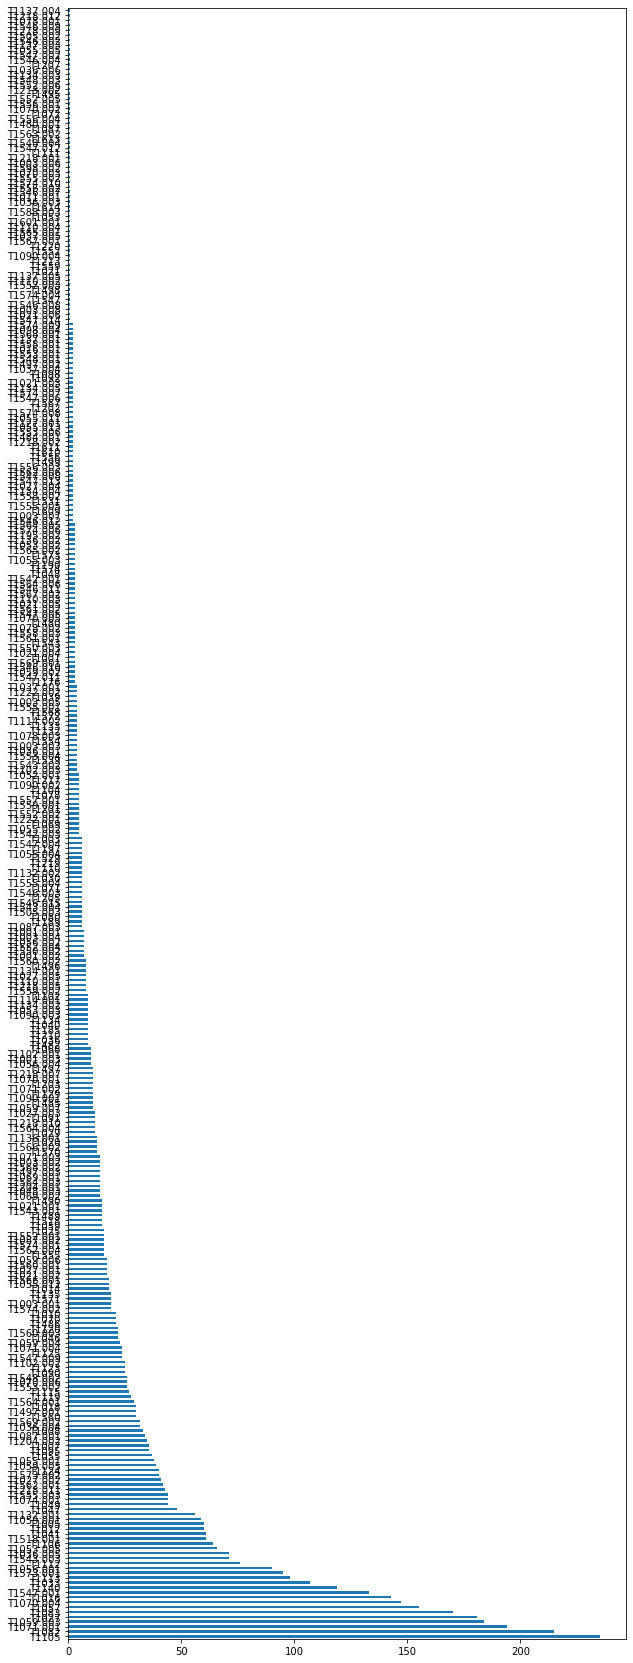

In [187]:
number_of_techniques = software_technique_table["target ID"].value_counts()
number_of_techniques.plot(kind = 'barh')
software_technique_table["target ID"].value_counts().plot(kind='barh', figsize=(10, 30))

In [188]:
number_of_techniques_per_software = software_technique_table["source ID"].value_counts()
number_of_techniques_per_software
#software_technique_table["source ID"].value_counts().plot(kind='barh', figsize=(40, 60))

S0260    71
S0363    68
S0154    58
S0534    49
S0266    48
         ..
S0104     1
S0100     1
S0120     1
S0095     1
S0099     1
Name: source ID, Length: 493, dtype: int64

In [199]:
#Vektor an Techniques pro Software
#Tabelle mit Techniques und Software auf den Achsen und vielen Nullen und Einsen 
association = pd.read_excel("./Data collection MITRE ATT&CK.xlsx", sheet_name = 'Association_compact')
matrix = pd.read_excel("./Data collection MITRE ATT&CK.xlsx", sheet_name = 'Vektordarstellung')

#matrix = matrix.append(software_table['created'].transpose(), ignore_index = True)
dfmatrix = pd.DataFrame(matrix)
dfmatrix = dfmatrix.set_index('ID')

#initialisiere die Werte in der Tabelle mit 0
dfmatrix = dfmatrix.fillna(int(0))

ValueError: Worksheet named 'Association_compact' not found

In [195]:
#eigentliche Magie | Kombinationen werden markiert, die "genutzt werden"
software = association['source ID']
techniques = association['target ID']

#Es werden Software-Technique-Tupel erstellt und in data gespeichert
data = []
for i in range (len(software)):
    tuple = [(software)[i], (techniques)[i]]
    data.append(tuple)

#Schleife durch die Tupel und dabei werden an der entschrechenden Matrix Einsen eingetragen
for i in data:
    dfmatrix[i[0]][i[1]] = int(1)  
dfmatrix

,S0066,S0065,S0469,S0045,S0073,S0552,S0331,S0092,S0504,S0584,...,S0385,S0067,S0006,S0103,S0111,S0227,S0225,S0123,S0248,S0350
ID,,,,,,,,,,,,,,,,,,,,,
created,31 May 2017,31 May 2017,10 June 2020,31 May 2017,31 May 2017,28 December 2020,29 January 2019,31 May 2017,10 September 2020,01 March 2021,...,04 June 2019,31 May 2017,31 May 2017,31 May 2017,31 May 2017,18 April 2018,18 April 2018,31 May 2017,17 October 2018,30 January 2019
T1548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1548.002,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
T1548.004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1548.001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T1102.002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
T1102.001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1102.003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [196]:
#nur einmal laufen lassen! 
technique_sum = pd.DataFrame(dfmatrix.sum(axis = 1)).drop('created')
dfmatrix.insert(0, "Summe", technique_sum, False)


dfmatrix.drop(dfmatrix[dfmatrix['Summe'] < 2].index, inplace = True)
dfmatrix
#dfmatrix.drop(bed.index == False)
#dfmatrix[dfmatrix(technique_sum < 10)].index

#nach datum sortieren
#Mitre Att&ck

,Summe,S0066,S0065,S0469,S0045,S0073,S0552,S0331,S0092,S0504,...,S0385,S0067,S0006,S0103,S0111,S0227,S0225,S0123,S0248,S0350
ID,,,,,,,,,,,,,,,,,,,,,
created,NaN,31 May 2017,31 May 2017,10 June 2020,31 May 2017,31 May 2017,28 December 2020,29 January 2019,31 May 2017,10 September 2020,...,04 June 2019,31 May 2017,31 May 2017,31 May 2017,31 May 2017,18 April 2018,18 April 2018,31 May 2017,17 October 2018,30 January 2019
T1548.002,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1548.001,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1134,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1134.002,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T1102,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1102.002,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
T1102.001,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [212]:
#Matrix wird in Excel Data collection gespeichert
with pd.ExcelWriter('./Data collection MITRE ATT&CK_Progress.xlsx', engine="openpyxl", mode = 'a') as writer:
    dfmatrix.to_excel(writer, sheet_name = 'Datamatrix with timestemp and reduced')

In [ ]:
#Experimente mit Tactics und Techniques
technique_list = pd.read_excel("./Data collection MITRE ATT&CK.xlsx", sheet_name = 'Techniques', usecols= ['ID', 'tactics'])
technique_list = technique_list.set_index('ID')
df_list = pd.DataFrame(technique_list).sort_values('tactics')
unique_list = df_list.drop_duplicates(subset = "tactics", ignore_index = True)
split_list = df_list['tactics'].str.split(',', expand = True)
#split_list = split_list.fillna("")
unique_list.set_index('tactics')
len(split_list)

In [ ]:
#wie oft kommt eine Kombination vor?
df_list.value_counts().plot(kind='barh', figsize=(15,7))


In [ ]:
#wieviele Techniken können in unterschiedlichen Phasen vorkommen

split_list.to_csv('split_list.csv', sep = ";")
fourtimes = split_list[3].value_counts().sum() 
threetimes = split_list[2].value_counts().sum() - fourtimes 
twotimes = split_list[1].value_counts().sum() - threetimes - fourtimes
onetime = split_list[0].value_counts().sum() - twotimes - threetimes - fourtimes

onetime, twotimes, threetimes, fourtimes


In [ ]:
#möchte hier die Techniken bekommen, die in mehr als einer Phase vorkommen und herausfinden,
#wie oft diese in Softwaren vorkommen
moretimes = split_list[1].dropna()
moretimes_sum = technique_sum[moretimes.index]
moretimes_sum.sort_values().plot(kind = 'barh', figsize = (50,50))
